## Unsupervised Learning Eploration with the Sell your Phone dataset 

*get it? CellPhone!!!!*

By. Dr. Vukosi Marivate http://www.vima.co.za

This notebook takes data from a crowdsourced phone datataset. You can see the original google form here http://bitly.com/phonepricedata

Some preprocessing has been done in Google spreadsheets. Namely standardizing all the Brands of the phones. In this notebook I do not remove outliers. I do remove submissions without all of the information (you could resolve this with data imputation).

**Acknowledgements:** Jessica Nemasisi - Jessica helped with collection of the data and some initial analysis as part of ther Honours Degree Work. 

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_excel("../data/sell_your_phone.xlsx")
df = df.dropna()
df = df.drop(['Timestamp'],axis=1)
#One Hot Encoding
cat_cols = ["Brand","Broken_Screen"]
df_continuous = pd.get_dummies(df,columns=cat_cols)
df_continuous.columns

Index([u'Age', u'Buying_Price', u'Camera', u'Battery', u'Screen_Size',
       u'Condition', u'Proposed_Sell_Price',
       u'Internal Storage Size in Gigabytes (GB)', u'Brand_Alcatel onetouch',
       u'Brand_Apple', u'Brand_Azpen', u'Brand_BlackBerry', u'Brand_HTC',
       u'Brand_Hisense', u'Brand_Huawei', u'Brand_Infinix', u'Brand_LG',
       u'Brand_Nokia', u'Brand_Samsung', u'Brand_Sony', u'Brand_Sony ',
       u'Brand_Vodafone', u'Brand_Xiaomi', u'Brand_ZTE', u'Broken_Screen_No',
       u'Broken_Screen_Yes'],
      dtype='object')

In [4]:
#Some default stuff for my plotting
aspect_mult = 0.9
figsize(aspect_mult*16,aspect_mult*9)
linewidth = 3

In [5]:
df_continuous.head()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB),Brand_Alcatel onetouch,Brand_Apple,...,Brand_LG,Brand_Nokia,Brand_Samsung,Brand_Sony,Brand_Sony,Brand_Vodafone,Brand_Xiaomi,Brand_ZTE,Broken_Screen_No,Broken_Screen_Yes
0,8,160,5.0,24,4.5,7,2000.0,8.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,19,207,4.0,12,3.5,8,3000.0,5.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,9,250,2.0,4,3.5,5,200.0,2.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,19,650,2.0,14,3.5,9,400.0,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,13,699,2.0,10,3.2,7,450.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Mixture Models

In [6]:
from sklearn import mixture
from sklearn.manifold import TSNE

In [7]:
X = df_continuous.values
reps = 3

In [8]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [9]:
log_likelihood = []
x_range = range(2,30)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = mixture.GaussianMixture(n_components=k, covariance_type='diag')
        clf.fit(X)
        temp_wc.append(clf.lower_bound_)
    log_likelihood.append(temp_wc)
log_likelihood= np.array(log_likelihood)

/Users/vima/anaconda/lib/python2.7/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


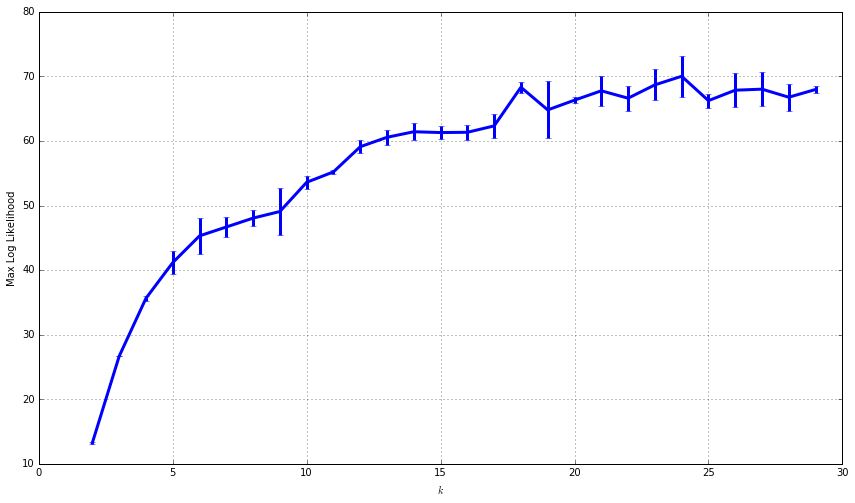

In [10]:
pyplot.errorbar(x_range,np.mean(log_likelihood,axis=1),
                yerr = np.std(log_likelihood,axis=1), linewidth=linewidth)
plt.ylabel("Max Log Likelihood")
plt.xlabel("$k$")
plt.grid()

In [16]:
k=20
clf = mixture.GaussianMixture(n_components=k, covariance_type='diag')
clf.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
cluster_labels = clf.predict(X)

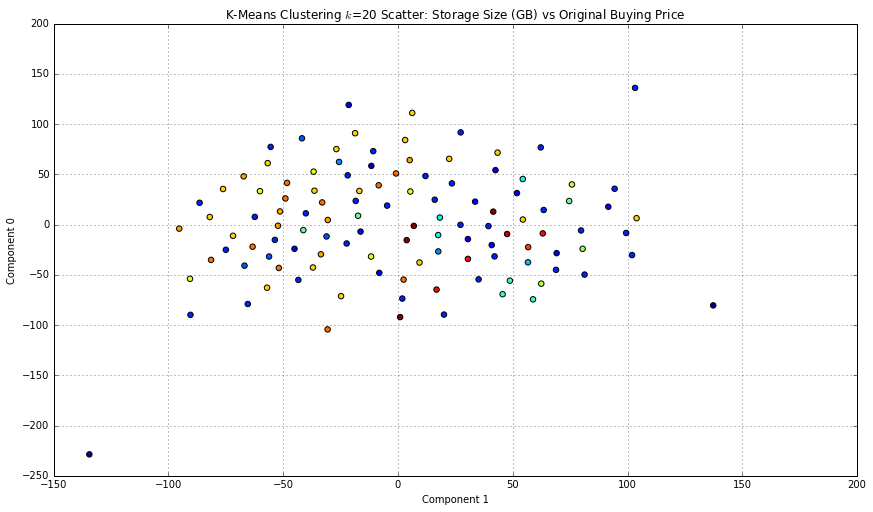

In [18]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()

In [19]:
cluster = 2
print "Brand Buy Sell"
for i in range(len(cluster_labels)):
    if cluster_labels[i] == cluster:
        print df.Brand.iloc[i], df.Buying_Price.iloc[i], df.Proposed_Sell_Price.iloc[i]

Brand Buy Sell
Apple 1000 900.0
Apple 2000 1000.0
Apple 3000 2.5
LG 3310 3000.0
Apple 5000 4000.0
Apple 6000 3000.0
Apple 6000 4000.0
Apple 6000 3000.0
Apple 7000 3500.0
HTC 8000 4500.0
LG 8000 4000.0


In [20]:
len(cluster_labels)

115